In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly 
import cufflinks as cf
cf.go_offline()
import sklearn 
import numpy as np

In [ ]:
#Predict: Power Plant location by state, FL (0) or TX (1) 
#based on:'Net Count','Net Megawatthours','Net Thousand Dollars','Ownership'
#from EIA 861 2016-2018

In [2]:
df = pd.read_excel(r'C:\Users\matth\Documents\Excel EIA Energy\New folder (2)\Sales 2018 EIA.xlsx', sheet_name='States')
df2 = pd.read_excel(r'C:\Users\matth\Documents\Excel EIA Energy\New folder (2)\Sales 2017 EIA.xlsx', sheet_name='States')
df3 = pd.read_excel(r'C:\Users\matth\Documents\Excel EIA Energy\New folder (2)\Sales 2016 EIA.xlsx', sheet_name='States')

In [3]:
df.rename(columns={'Utility Characteristics':'Data Year', 'Unnamed: 1':'Utility Number', 'Unnamed: 2':'Utility_Name', 'Unnamed: 3':'Part',
       'Unnamed: 4':'Service Type', 'Unnamed: 5':'Data Type', 'Unnamed: 6':'State', 'Unnamed: 7':'Ownership', 'Unnamed: 8':'BA Code',
       'RESIDENTIAL':'Thousand Dollars', 'Unnamed: 10':'Megawatthours', 'Unnamed: 11':'Count', 'COMMERCIAL':'Thousand Dollars',
       'Unnamed: 13':'Megawatthours', 'Unnamed: 14':'Count', 'INDUSTRIAL':'Thousand Dollars', 'Unnamed: 16':'Megawatthours',
       'Unnamed: 17':'Count', 'TRANSPORTATION':'Thousand Dollars', 'Unnamed: 19':'Megawatthours', 'Unnamed: 20':'Count', 'TOTAL':'Net Thousand Dollars',
       'Unnamed: 22':'Net Megawatthours', 'Unnamed: 23':'Net Count'},inplace=True)
df2.rename(columns={'Utility Characteristics':'Data Year', 'Unnamed: 1':'Utility Number', 'Unnamed: 2':'Utility_Name', 'Unnamed: 3':'Part',
       'Unnamed: 4':'Service Type', 'Unnamed: 5':'Data Type', 'Unnamed: 6':'State', 'Unnamed: 7':'Ownership', 'Unnamed: 8':'BA Code',
       'RESIDENTIAL':'Thousand Dollars', 'Unnamed: 10':'Megawatthours', 'Unnamed: 11':'Count', 'COMMERCIAL':'Thousand Dollars',
       'Unnamed: 13':'Megawatthours', 'Unnamed: 14':'Count', 'INDUSTRIAL':'Thousand Dollars', 'Unnamed: 16':'Megawatthours',
       'Unnamed: 17':'Count', 'TRANSPORTATION':'Thousand Dollars', 'Unnamed: 19':'Megawatthours', 'Unnamed: 20':'Count', 'TOTAL':'Net Thousand Dollars',
       'Unnamed: 22':'Net Megawatthours', 'Unnamed: 23':'Net Count'},inplace=True)
df3.rename(columns={'Utility Characteristics':'Data Year', 'Unnamed: 1':'Utility Number', 'Unnamed: 2':'Utility_Name', 'Unnamed: 3':'Part',
       'Unnamed: 4':'Service Type', 'Unnamed: 5':'Data Type', 'Unnamed: 6':'State', 'Unnamed: 7':'Ownership', 'Unnamed: 8':'BA Code',
       'RESIDENTIAL':'Thousand Dollars', 'Unnamed: 10':'Megawatthours', 'Unnamed: 11':'Count', 'COMMERCIAL':'Thousand Dollars',
       'Unnamed: 13':'Megawatthours', 'Unnamed: 14':'Count', 'INDUSTRIAL':'Thousand Dollars', 'Unnamed: 16':'Megawatthours',
       'Unnamed: 17':'Count', 'TRANSPORTATION':'Thousand Dollars', 'Unnamed: 19':'Megawatthours', 'Unnamed: 20':'Count', 'TOTAL':'Net Thousand Dollars',
       'Unnamed: 22':'Net Megawatthours', 'Unnamed: 23':'Net Count'},inplace=True)

In [4]:
df = pd.concat([df,df2,df3],axis=0)

In [5]:
df.drop([0],axis=0,inplace=True)
df.drop([1],axis=0,inplace=True)
df.set_index(['Data Year'],inplace=True)

In [6]:
df = df[df['Utility Number']!= 99999]
df = df[df['Utility Number']!= 88888]
dftx = df[df['State'] == 'TX']
dffl = df[df['State'] == 'FL']

In [7]:
dftx = dftx[['Net Count','Net Megawatthours','Net Thousand Dollars','State','Ownership']]
dffl = dffl[['Net Count','Net Megawatthours','Net Thousand Dollars','State','Ownership']]

In [8]:
dffltx = pd.concat([dffl,dftx],axis=0)

In [9]:
def binstate(cols):
    State = cols[0]
    if State == 'FL':
        return 0
    else:
        return 1
def fxown(cols):
    Ownership = cols[0]
    if Ownership == 'Municipal':
        return 0
    elif Ownership == 'Cooperative':
        return 1
    elif Ownership == 'Retail Power Marketer':
        return 2
    elif Ownership == 'Investor Owned':
        return 3 
    else:
        return 4

In [10]:
dffltx['State'] = dffltx[['State']].apply(binstate,axis=1)
dffltx['Ownership'] = dffltx[['Ownership']].apply(fxown,axis=1)
dffltx.replace(to_replace='.',value=0,inplace=True)
dffltx161718 = dffltx

In [11]:
dffltx161718 = dffltx161718[(dffltx161718['Net Count'] <3000000)]
dffltx161718.head(-10)

,Net Count,Net Megawatthours,Net Thousand Dollars,State,Ownership
Data Year,,,,,
2018,4584,131006,14261.0,0,0
2018,12391,274223,29971.0,0,0
2018,33750,500976,63724.9,0,1
2018,51790,895036,101041.5,0,1
2018,175642,3316392,363296.8,0,1
...,...,...,...,...,...
2016,2207,87071,7500.0,1,2
2016,5080,95673,6178.2,1,2
2016,1,9,1.0,1,4


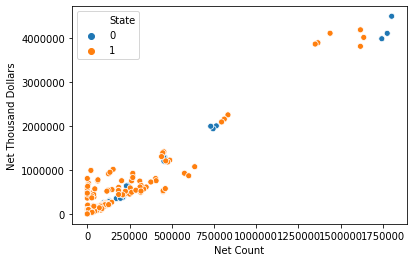

In [12]:
sns.scatterplot(x='Net Count', y='Net Thousand Dollars', hue='State', data=dffltx161718)

In [13]:
dffltx161718.describe()

,Net Count,Net Megawatthours,Net Thousand Dollars,State,Ownership
count,7.250000e+02,7.250000e+02,7.250000e+02,725.000000,725.000000
mean,7.433735e+04,2.135661e+06,1.946170e+05,0.780690,1.423448
std,2.066914e+05,5.440451e+06,5.222641e+05,0.414065,1.049205
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.045000e+03,1.270490e+05,1.139470e+04,1.000000,1.000000
50%,1.589900e+04,4.397470e+05,4.131680e+04,1.000000,1.000000
75%,4.403400e+04,1.273160e+06,1.152933e+05,1.000000,2.000000
max,1.801551e+06,4.380500e+07,4.486176e+06,1.000000,4.000000


C:\Users\matth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\matth\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



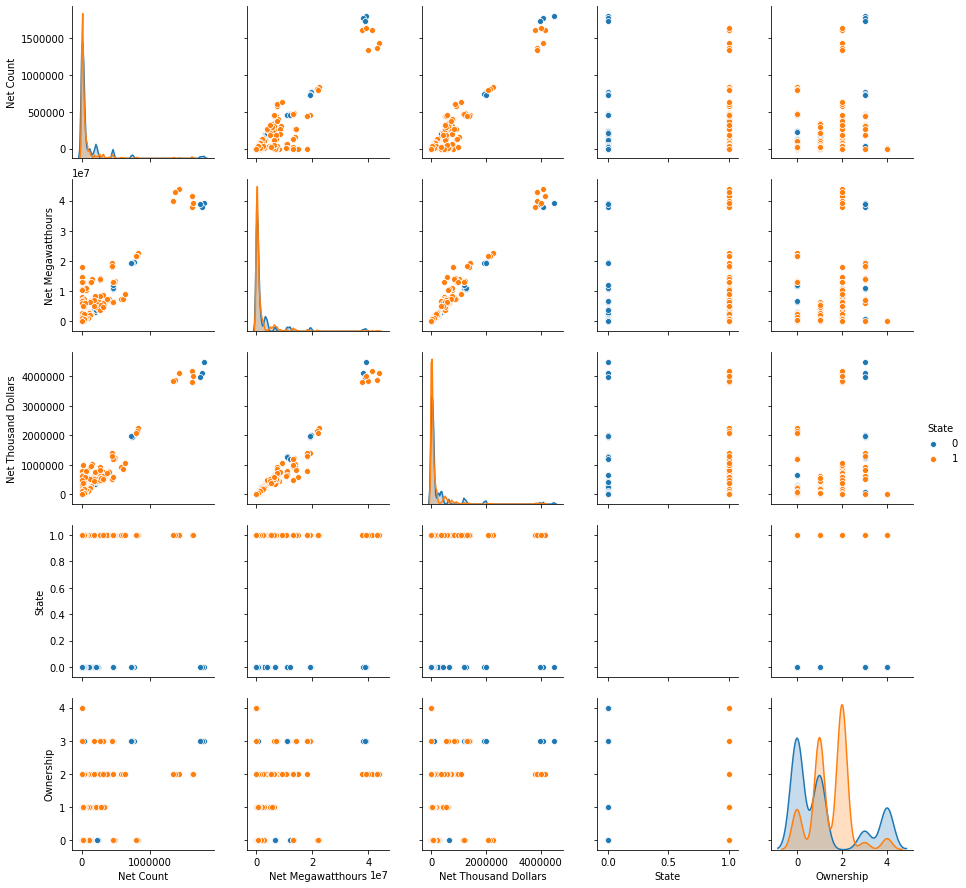

In [14]:
sns.pairplot(dffltx161718,hue='State')

In [15]:
X = dffltx161718[['Net Count', 'Net Megawatthours', 'Net Thousand Dollars','Ownership']]
y = dffltx161718[['State']]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=101)

In [18]:
lg = LogisticRegression()

In [19]:
lg.fit(X_train,y_train)

C:\Users\matth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\matth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
lg.coef_

array([[ 3.19211595e-05,  5.71654234e-06, -6.84232679e-05,
         7.50743378e-08]])

In [21]:
predictions = lg.predict(X_test)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        54
           1       0.89      0.77      0.82       164

    accuracy                           0.75       218
   macro avg       0.69      0.74      0.70       218
weighted avg       0.79      0.75      0.76       218



In [23]:
print(confusion_matrix(y_test,predictions))

[[ 38  16]
 [ 38 126]]
